In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import missingno as mns
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [6]:
#CLUSTERING USING TWO DIFFERENT METHODS
#importing and reading the dataset
fnc = pd.read_csv('Thailand_sellers.csv')
fnc.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,529,512,262,432,92,3,1,1,0
1,2,photo,150,0,0,150,0,0,0,0,0
2,3,video,227,236,57,204,21,1,1,0,0
3,4,photo,111,0,0,111,0,0,0,0,0
4,5,photo,213,0,0,204,9,0,0,0,0


In [7]:
#identifying number of rows and columns
fnc.shape

(7050, 11)

In [8]:
fnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_id      7050 non-null   int64 
 1   status_type    7050 non-null   object
 2   num_reactions  7050 non-null   int64 
 3   num_comments   7050 non-null   int64 
 4   num_shares     7050 non-null   int64 
 5   num_likes      7050 non-null   int64 
 6   num_loves      7050 non-null   int64 
 7   num_wows       7050 non-null   int64 
 8   num_hahas      7050 non-null   int64 
 9   num_sads       7050 non-null   int64 
 10  num_angrys     7050 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 606.0+ KB


In [9]:
fnc.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


<AxesSubplot:>

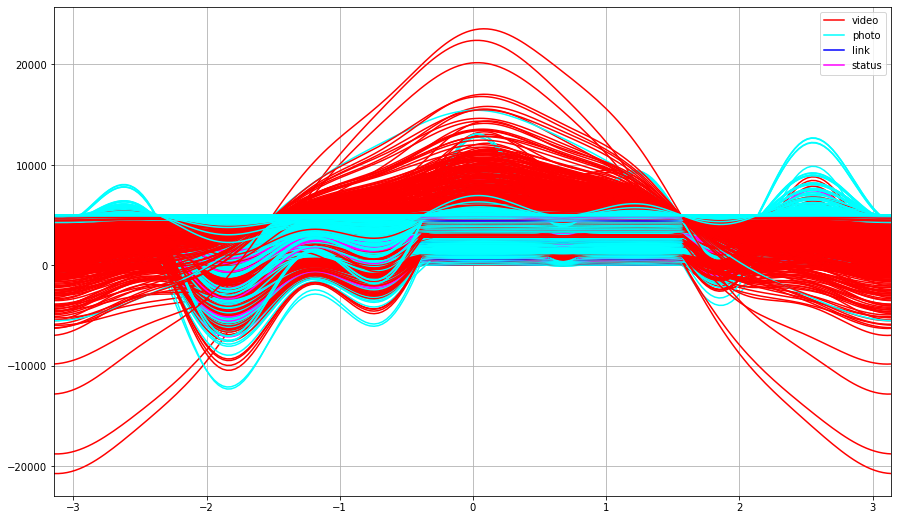

In [10]:
#plotting to show the distribution of status_type, which is the focus column using andrews curve plot stlye
plt.figure(figsize=(15,9))
pd.plotting.andrews_curves(fnc,'status_type',color=['red','cyan','blue','magenta'])

In [11]:
#checking the values under status type columns
fnc['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

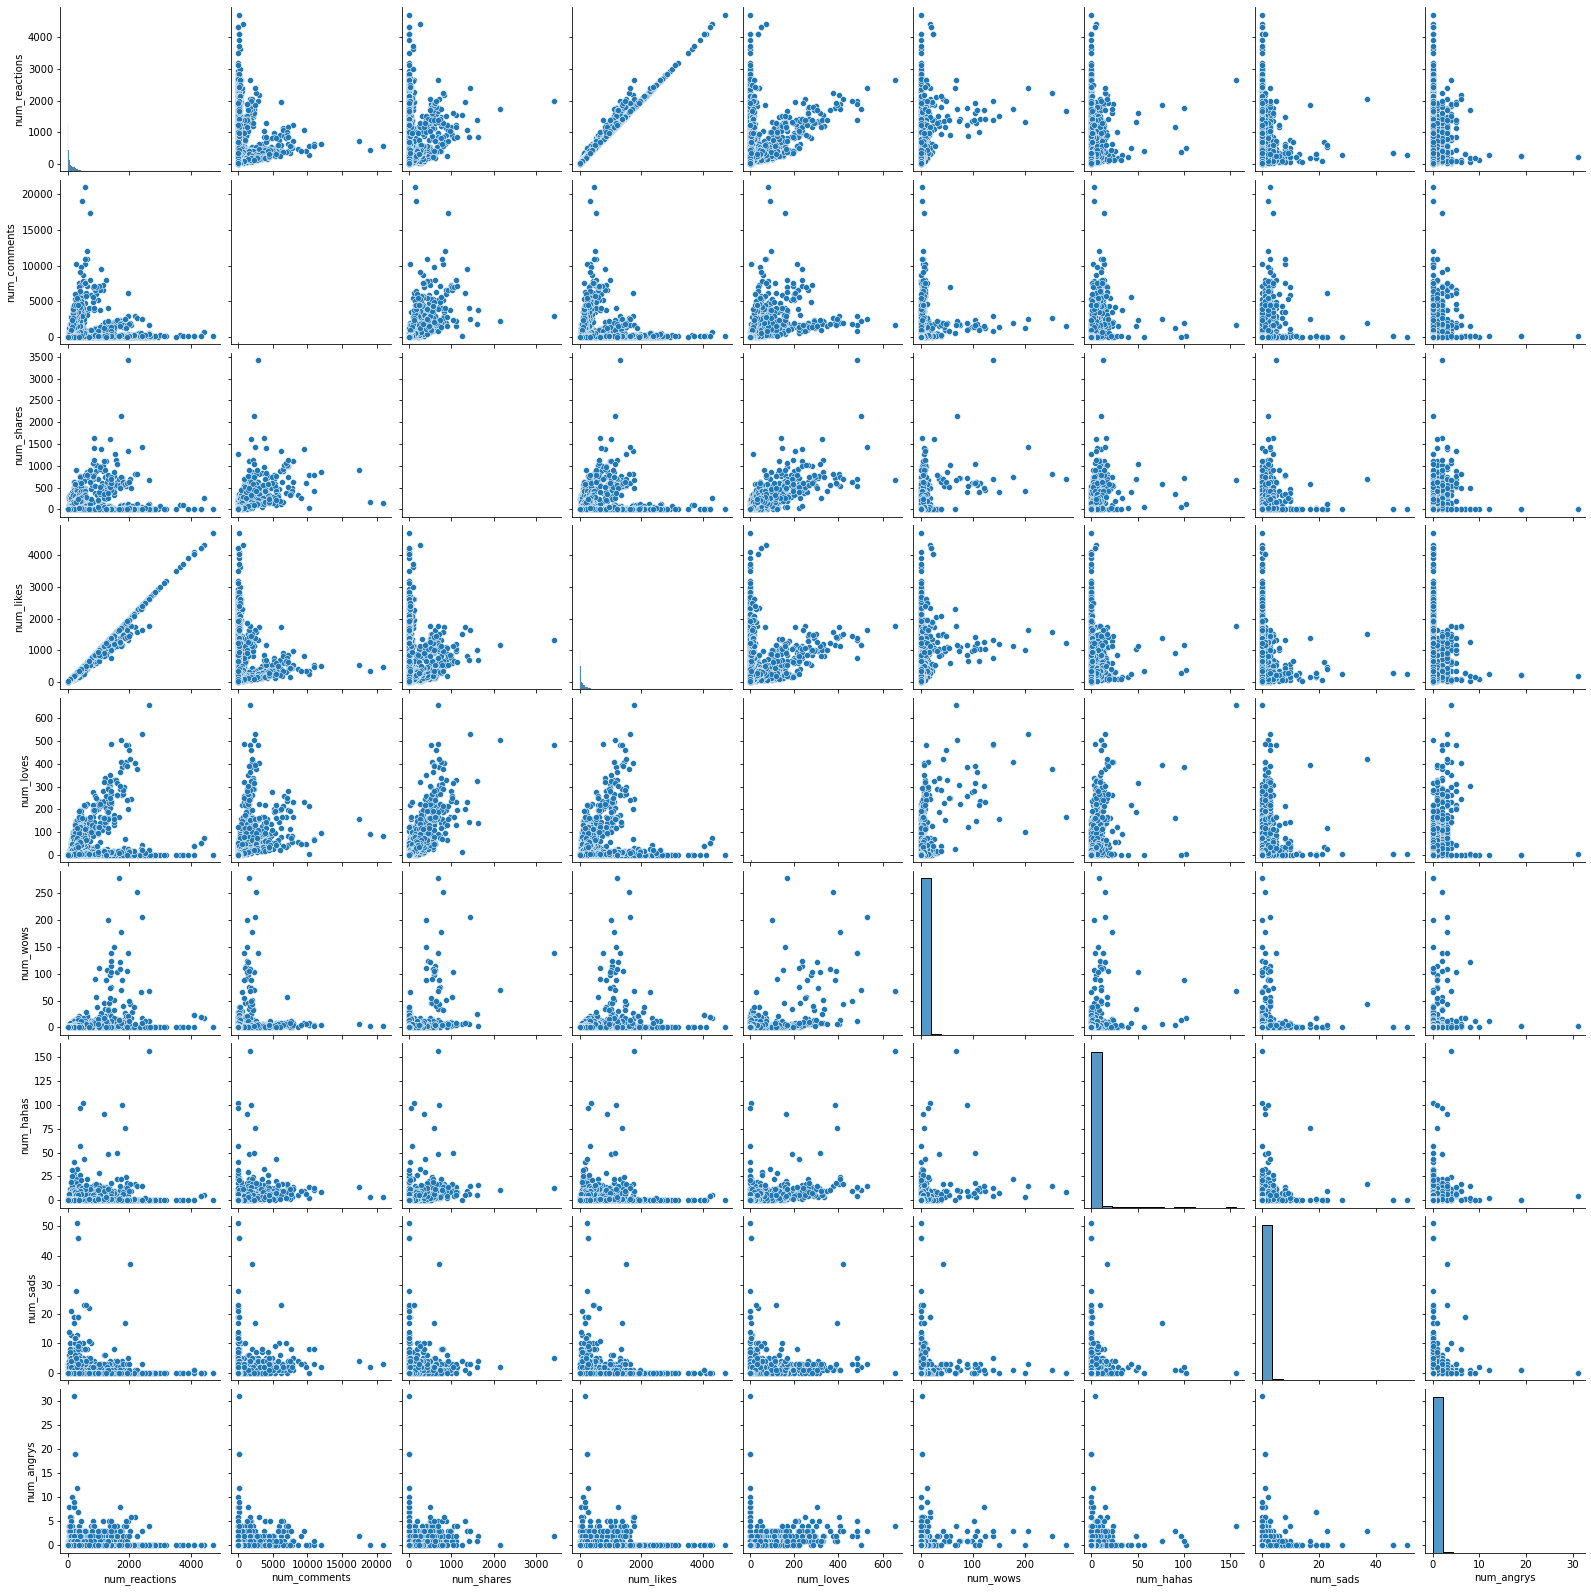

In [12]:
#visualizing the numerical columns
X = fnc.iloc[:,2:11]
sns.pairplot(X)

In [13]:
#standardizing the dataset by scaling it
fc_X = StandardScaler()
X = fc_X.fit_transform(X)

In [14]:
#finding the optimal cluster numbers using elbow method
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=42)
    km.fit(X)
    wcss.append(km.inertia_)
wcss

[63449.99999999987,
 48278.09824220542,
 38372.997723869616,
 32469.791362309854,
 28626.37472560932,
 25309.732712527126,
 22132.3609772419,
 19254.453746527717,
 17578.735526243086,
 16223.453734796185]

Text(0.5, 1.0, 'ELBOW METHOD')

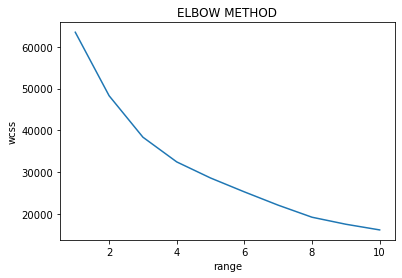

In [15]:
#plotting elbow graph
plt.plot(range(1,11),wcss)
plt.xlabel('range')
plt.ylabel('wcss')
plt.title('ELBOW METHOD')

In [16]:
#kmeans being fitted in to fnc data at 42 random state @k=4
km = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=42)
y_means = km.fit_predict(X)

In [17]:
#using PCA method to reduce dataset dimensionality as we have about 10 columns
#and cannot visualize scatterplot for such ten columns
from sklearn.decomposition import PCA

frpca = PCA(n_components=2)
f_reduced = frpca.fit_transform(X)

frpca.explained_variance_ratio_

array([0.3832663 , 0.19289793])

In [18]:
#summing variance ratio to know percentage of retained original variance
#about 58% of  variance retained
sum(frpca.explained_variance_ratio_)

0.5761642384237822

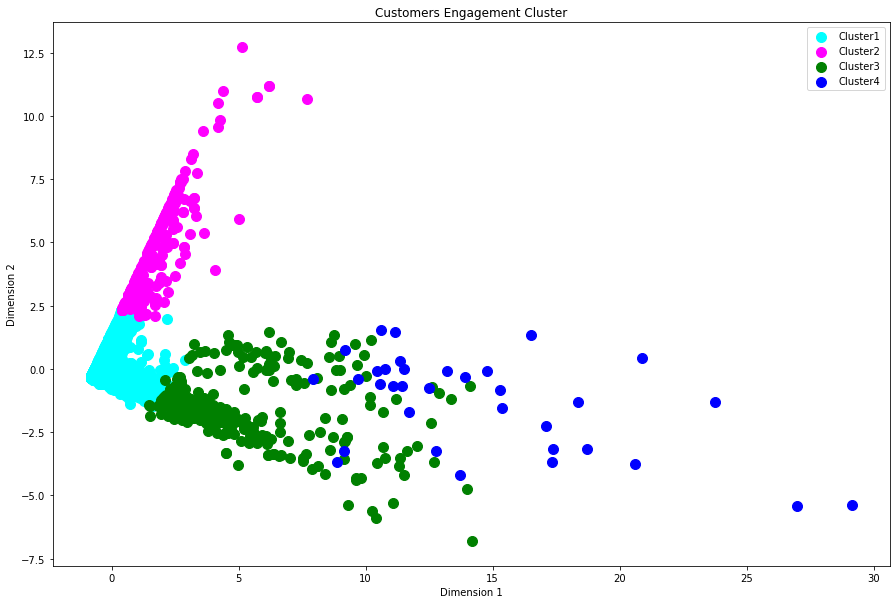

In [19]:
#plotting and visualizing the clusters
colours = ['cyan','magenta','green','blue']
plt.figure(figsize=(15,10))
for i in range(4):
    plt.scatter(f_reduced[y_means==i,0],f_reduced[y_means==i,1],
                s = 100, c = colours[i], label = 'Cluster'+str(i+1))
plt.title("Customers Engagement Cluster")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Hierarchical Cluster Dendrogram')

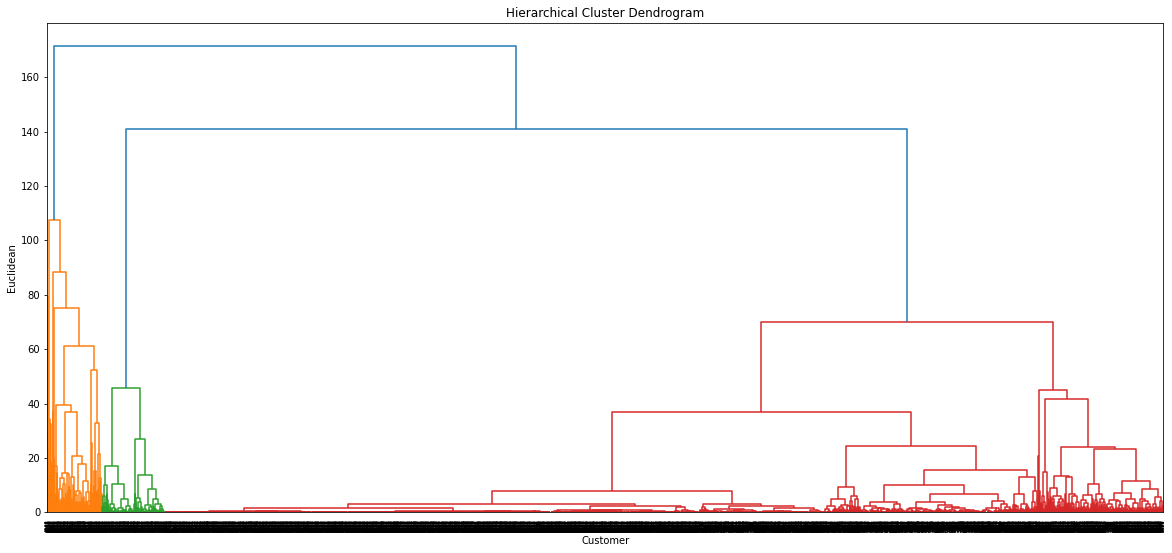

In [20]:
#HIERARCHICAL CLUSTERING
#using dendrogram to ascertain the number of clusters
plt.figure(figsize=(20,9))
dendrogram = sch.dendrogram(sch.linkage(X,method ='ward'))
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.title('Hierarchical Cluster Dendrogram')

In [21]:
#filling the clustering method into the dataset
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_means2=hc.fit_predict(X)

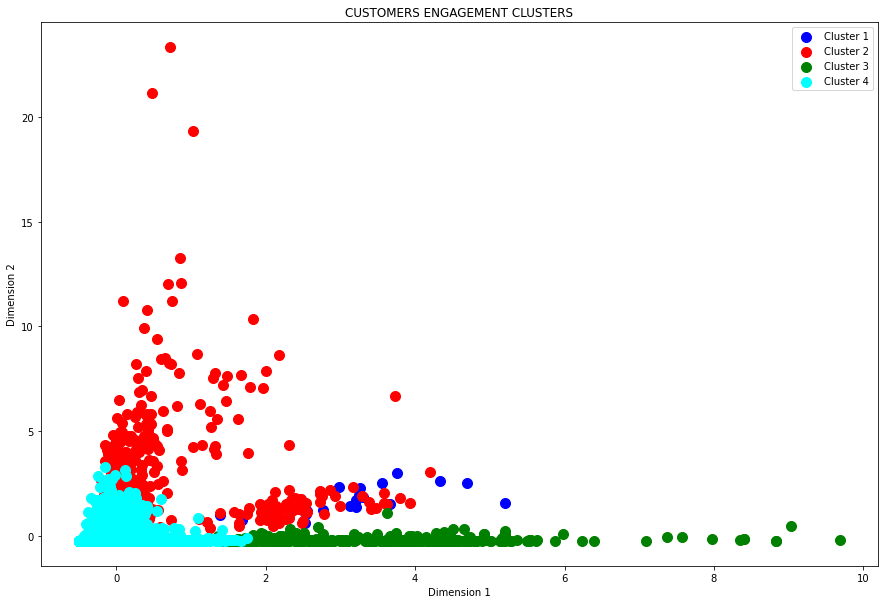

In [22]:
#visualizing the hierarchical clustering result
#plt.style.use('ggplot')
plt.figure(figsize=(15,10))
plt.scatter(X[y_means2==0,0],X[y_means2==0,1],c='blue', s=100,label='Cluster 1')
plt.scatter(X[y_means2==1,0],X[y_means2==1,1],c='red', s=100,label ='Cluster 2')
plt.scatter(X[y_means2==2,0],X[y_means2==2,1],c='green', s=100,label='Cluster 3')
plt.scatter(X[y_means2==3,0],X[y_means2==3,1],c='cyan', s=100,label ='Cluster 4')
plt.title('CUSTOMERS ENGAGEMENT CLUSTERS')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()